In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
attacks = pd.read_csv('attacks.csv',engine='python')

In [10]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 16 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
dtypes: int64(1), object(15)
memory usage: 749.1+ KB


In [11]:
#Drop Time and Species 
attacks = attacks.drop(['Time','Species ','Age'],axis=1)

In [13]:
attacks = attacks.dropna(axis=0)

In [14]:
#Chi square for contingency tests(First some bucketing needs to be done)
len(attacks['Activity'].unique().tolist())

1125

In [15]:
attacks['Activity'].value_counts()

Surfing                                                    859
Swimming                                                   726
Spearfishing                                               274
Fishing                                                    273
Wading                                                     134
                                                          ... 
Gaffing & attempting to bring onboard a harpooned shark      1
Swimming outside fishing net                                 1
Feeding mullet to sharks                                     1
Retrieving meat from a cage in the water                     1
Free diving for sinkers                                      1
Name: Activity, Length: 1125, dtype: int64

In [16]:
attacks = attacks.replace({'Scuba diving':'Diving','Free diving':'Diving','Pearl diving':'diving','Freediving':'Diving'})

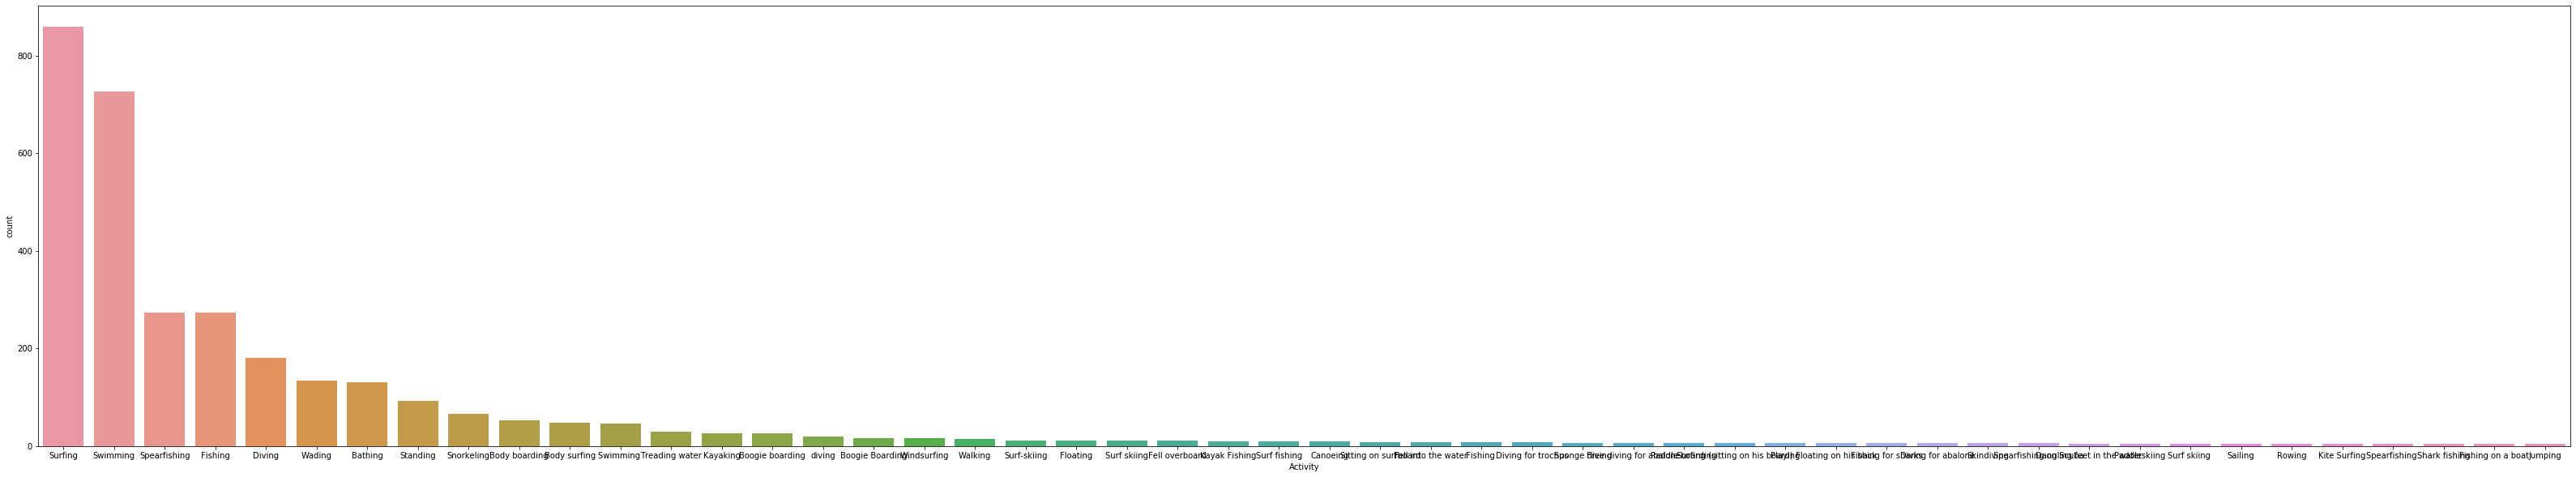

In [17]:
plt.figure(figsize=(56,10 ))
sns.countplot(x='Activity',data=attacks,order=attacks.Activity.value_counts().iloc[:50].index)



In [18]:
activity = []
for i in attacks['Activity']:
    activity.append(i.split(" ")[0])


In [19]:
activity

['Surfing',
 'Surfing',
 'Surfing',
 'Surfing',
 'Surfing',
 'Wading',
 'Swimming',
 'Kite',
 'Boogie',
 'Surfing',
 'Body',
 'Spearfishing',
 'Surfing',
 'Surfing',
 'Wading',
 'Snorkeling',
 'SUP',
 'Surfing',
 'Swimming',
 'Kayaking',
 'Lobstering',
 'Surfing',
 'Surfing',
 'Surfing',
 'Spearfishing',
 'Fishing',
 'Surfing',
 'Swimming',
 'Wading',
 'Fishing',
 'Fishing',
 'Fishing',
 'Swimming',
 'Fishing',
 'Surfing',
 'Spearfishing',
 'Floating',
 'Wading',
 'Surfing',
 'Spearfishing',
 'Floating',
 'Standing',
 'Surfing',
 'Swimming',
 'Diving',
 'Swimming',
 'Surfing',
 'Swimming',
 'Swimming',
 'Swimming',
 'Swimming',
 'Swimming',
 'Swimming',
 'Teasing',
 'Floating',
 'Fishing',
 'Surfing',
 'Surfing',
 'Surf-skiing',
 'Swimming',
 'Spearfishing',
 'Spearfishing',
 'Walking',
 'SUP',
 'Snorkeling',
 'Surfing',
 'Surfing',
 'Body',
 'Fishing',
 'Swimming',
 'Kite',
 'Spearfishing',
 'Wading',
 'Feeding',
 'Surfing',
 'Walking',
 'Windsurfing',
 'Surfing',
 'Surfing',
 'Spearf

In [20]:
#appending this new activity to dataframe
attacks['Activity_new'] = activity

In [21]:
attacks['Activity_new'].nunique()

318

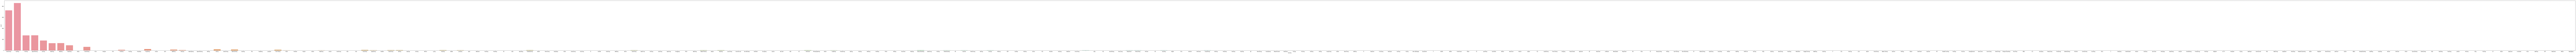

In [22]:
plt.figure(figsize=(500,10))
sns.countplot(x='Activity',data=attacks,order=attacks.Activity_new.value_counts().iloc[:296].index)


In [23]:
attacks = attacks.replace({'Boogie':'Boogie boarding','Body':'Bodyboarding','Free':'Diving','Surf':'Surfing'
                                      ,'Fishing,':'Fishing','Scuba':'Diving','Walking':'Wading','Spearfishing,':'Spearfishing',
                                      'Swimming,':'Swimming','Windsurfing':'Surfing','diving':'Diving',
                                       'Surfing,':'Surfing','Dived':'Diving','Kayak':'Kayaking','Skindiving':'Diving','Diving,':'Diving',
                                      'SCUBA':'Diving','Spearing':'Spearfishing','Freediving':'Diving','Snorkeling,':'Snorkeling',
                                      'Wading,':'Wading','Body-boarding':'Bodyboarding','Canoe':'Canoeing','Pearl':'Diving','Wade-fishing':'Wading',
                                      'Diving?':'Diving','fishing':'Fishing','Skindiving,':'Diving','bathing':'Bathing','Wading?':'Wading',
                                      'Boogie-boarding':'Boogie boarding','Surf-fishing':'Fishing','Google-diving':'Diving','Bodysurfing':'Surfing',
                                      'Fisherman':'Fishing','Windsurfing,':'Surfing','Batin':'Bathing','Swimming.':'Swimming','"Swimming':'Swimming',
                                      'Diving.':'Diving','Freediving,':'Diving','Speared':'Spearfishing','Free-diving':'Diving'
                                      ,'Body':'Bodyboarding'})

In [24]:
attacks['Activity_new'].nunique()

277

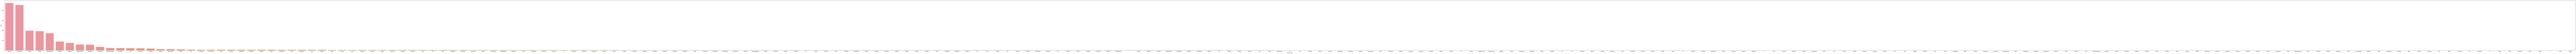

In [25]:
plt.figure(figsize=(500,10))
sns.countplot(x='Activity_new',data=attacks,order=attacks.Activity_new.value_counts().iloc[:255].index)

In [26]:
attacks = attacks.replace({'Fell':'Standing','Treading':'Wading','Surf-skiing':'Surfing','Jumped':'Standing',
                                       'Paddle':'Swimming','Sea':'Swimming','Splashing':'Swimming','Wade':'Wading',
                                       'Collecting':'Wading','Washing':'Wading','Jumping':'Standing','Escaping':'Swimming',
                                       'Hunting':'Fishing','Standing,':'Standing','Catching':'Fishing','Stand-Up':'Standing',
                                       'Cleaning':'Wading','Netting':'Fishing','Crayfishing':'Fishing','Net':'Fishing','Wakeboarding':'Bodyboarding',
                                       'Board':'Bodyboarding','Paddle-surfing':'Surfing','Google-diving':'Diving','Paddling':'Swimming','boat':'Boating',
                                       'Rowing':'Boating','Standing,':'Standing',})


In [27]:
attacks['Activity_new'].nunique()

251

In [42]:
activities = attacks.groupby('Activity_new').size()

In [43]:
activities = activities[activities>25]

In [44]:
activities = activities.to_frame()
activities 

,0
Activity_new,
Bathing,150
Bodyboarding,120
Boogie boarding,46
Diving,383
Fishing,412
Floating,41
Kayaking,44
Snorkeling,71
Spearfishing,344


In [45]:
activities = activities.rename(columns={0:'Count'})

In [46]:
activities

,Count
Activity_new,
Bathing,150
Bodyboarding,120
Boogie boarding,46
Diving,383
Fishing,412
Floating,41
Kayaking,44
Snorkeling,71
Spearfishing,344


In [47]:
attacks = pd.merge(attacks, activities, on='Activity_new')

In [48]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Is_Fatal,Investigator or Source,Activity_new,Count_x,Count_y
0,2016.09.18.c,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",Surfing,961,961
1,2016.09.18.b,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",Surfing,961,961
2,2016.09.18.a,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",Surfing,961,961
3,2016.09.17,17-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Struck by fin on chest & leg,N,"The Age, 9/18/2016",Surfing,961,961
4,2016.09.15,16-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",Surfing,961,961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,1835.02.21.R,Reported 21-Feb-1835,1835,Unprovoked,VANUATU,Sanma Province,"Bay of Yago, Espiritu Santo Island",Bathing,John McKeig,M,FATAL,Y,"Sydney Gazette, 2/21/1835",Bathing,150,150
3946,1832.01.23.R,Reported 23-Jan-1832,1832,Unprovoked,AUSTRALIA,New South Wales,Sydney,Bathing,male,M,Laceration to leg,N,"Sydney Herald, 1/23/1832",Bathing,150,150
3947,1830.04.30,30-Apr-1830,1830,Unprovoked,INDIA,Tamil Nadu,St. Thomé,Bathing,Ensign Bromwick,M,FATAL,Y,"Madras Gazette, 5/1/1830",Bathing,150,150
3948,1700.00.00.b,1700s,1700,Unprovoked,FRANCE,Côte d'Azur,Antibes,Bathing,seaman,M,Leg severed,N,"A. De Maddalena, citing Cazeils (1998)",Bathing,150,150


In [49]:
#WHICH Activity is most fatal

In [50]:
attacks = attacks.rename(columns={'Fatal (Y/N)':'Is_Fatal'})

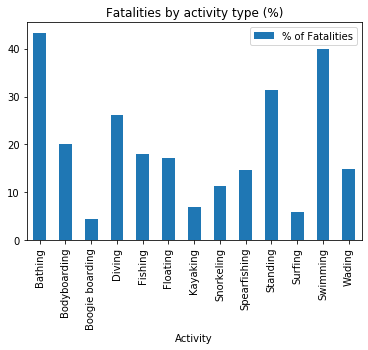

In [51]:
df_Activity = pd.DataFrame(columns=["Activity", "% of Fatalities"])
i=0
for activity in list(attacks['Activity_new'].unique()):
    ratio = attacks[(attacks['Activity_new']==activity)&(attacks['Is_Fatal']=='Y')].shape[0] / attacks[attacks['Activity_new']==activity].shape[0]
    df_Activity.loc[i] = (activity, ratio*100)
    i += 1
     
df_type = df_Activity.groupby(by="Activity").sum()
df_type.plot(kind='bar',title='Fatalities by activity type (%)')

# Despite Surfing being the most attacked activity the fatalities is highest for Bathing and swimming (Possible reasons for this might be sharks are attracted to splashing in water) Surfing and Diving are more or less case of mistaken identity

In [27]:
#attacks_month.to_csv('attacks_cleaned_activity.csv')